In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Generate Correlated Data in 2D

(0.0, 100.0)

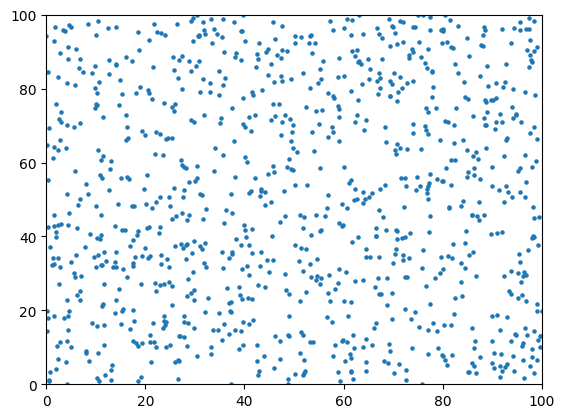

In [96]:
## First, we generate the 2d box with 1000 random points: 
N = 1000
h = 100 # height 
w = 100 # width


def f_rand(N,h,w): 
    s = []
    for i in range(N):
        x = np.random.uniform(0,h)
        y = np.random.uniform(0,w)  
        x = x % h # periodicity condition
        y = y % w
        s.append((x,y))
    return s



R = f_rand(N,h,w)
R = np.array(R)
x_c, y_c = zip(*R)
mpl.scatter(x_c, y_c,5)
mpl.xlim(0, w)
mpl.ylim(0, h)

In [100]:
size = 100  # Size of the 2D box (side length)
num_points = 1000  # Total number of points
c_num = 20  # Number of circumferences
r_c = 30  

z = num_points // c_num

# Create an empty list to store the points
points = []

# Generate random centers for the circumferences within the box
#circle_centers_x = np.array(f_rand(num_points,size,size))
#circle_centers_y = np.array(f_rand(num_points,size,size))
circle_centers_x = np.random.uniform(r_c,100,c_num)
circle_centers_y = np.random.uniform(r_c,100,c_num)



In [101]:
# Create points around each circumference
for i in range(c_num):
    center_x = circle_centers_x[i]
    center_y = circle_centers_y[i]

    for _ in range(z):
     
     theta = np.linspace(0, 2 * np.pi)
     x = center_x + r_c*np.cos(theta)
     y = center_y + r_c*np.sin(theta)
     x = x % h 
     y = y % w 
    
    # Append the points to the list
    points.extend(list(zip(x, y)))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


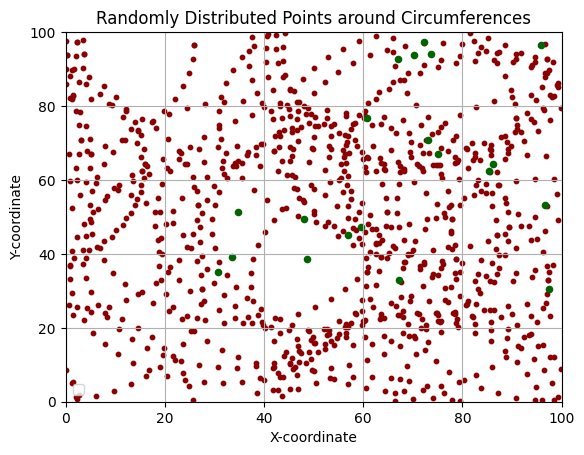

In [102]:
# Ensure we have the desired number of points
D = np.array(points)
points = points[:num_points]

# Plot the points
#plt.figure(figsize=(8, 8))
plt.scatter(*zip(*points), s=10, color='darkred', marker='o')
plt.scatter(circle_centers_x, circle_centers_y, s=20, c='darkgreen', marker='o')
plt.xlim(0, size)
plt.ylim(0, size)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Randomly Distributed Points around Circumferences')
plt.grid(True)
plt.legend()
plt.show()
# np.savetxt('points_catalog.csv', points, delimiter=',')

In [124]:
def f_distance(p1, p2):
    return np.linalg.norm(p1 - p2)



distance_D = []

for i in range(num_points): 
    for j in range(i+1,N): 
        distance = f_distance(D[i],D[j])
        distance_D.append(distance)

distance_D 

D_norm = np.linalg.norm(distance_D) 
DD = distance_D/D_norm 
np.linalg.norm(DD)

1.0

In [146]:
num_bins = 100 #len(distance_D)
hist_min = min(distance_D)
hist_max = max(distance_D)

hist, bin_edges = np.histogram(distance_D, bins=num_bins, range=(hist_min, hist_max))

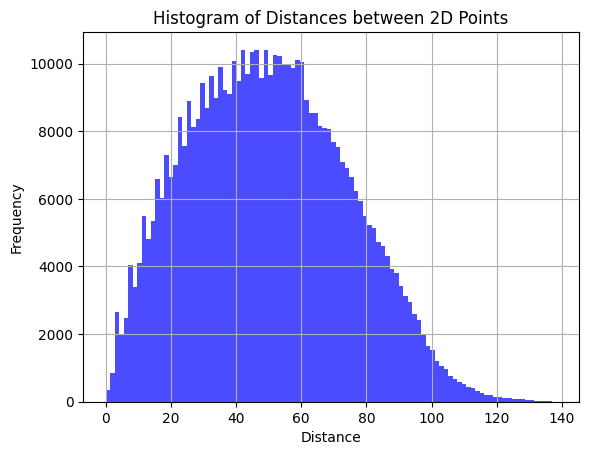

In [147]:
# Plot histogram
plt.hist(distance_D, bins=num_bins, range=(hist_min, hist_max), alpha=0.7, color='blue')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances between 2D Points')
plt.grid(True)
plt.show()


In [148]:


distance_R = []

for i in range(num_points): 
    for j in range(i+1,num_points): 
        distance = f_distance(R[i],R[j])
        distance_R.append(distance)



R_norm = np.linalg.norm(distance_R) 
RR = distance_R/R_norm 
np.linalg.norm(RR)

0.9999999999999999

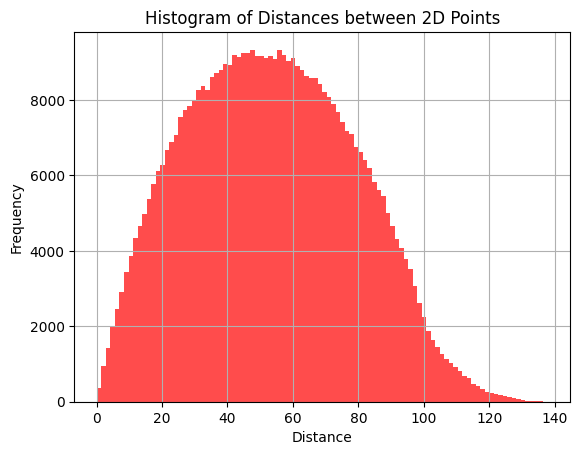

In [149]:
# Plot histogram
num_bins = 100 #len(distance_D)
histR_min = min(distance_R)
histR_max = max(distance_R)

hist, bin_edges = np.histogram(distance_R, bins=num_bins, range=(histR_min, histR_max))


plt.hist(distance_R, bins=num_bins, range=(histR_min, histR_max), alpha=0.7, color='red')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances between 2D Points')
plt.grid(True)
plt.show()
